In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gatering Data
# impor day.csv 
day_df = pd.read_csv("../day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# impor hour.csv
hour_df = pd.read_csv("../hour.csv",delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Assessing Data
# Pada tabel day_df
# Mengecek missing value dan duplikasi 
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Mencegek kevalidan nilai season
print(day_df["season"].unique())

[1 2 3 4]


In [8]:
# Mengecek kevalidan nilai yr
print(day_df["yr"].unique())

[0 1]


In [9]:
# Mengecek kevalidan nilai mnth
print(day_df["mnth"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [10]:
# Mengecek kevalidan nilai weathersit
print(day_df["weathersit"].unique())

[2 1 3]


In [11]:
# Mengecek skala normalisasi apakah melebihi 1
print(day_df[["temp", "atemp", "hum", "windspeed"]].describe())

             temp       atemp         hum   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.627894    0.190486
std      0.183051    0.162961    0.142429    0.077498
min      0.059130    0.079070    0.000000    0.022392
25%      0.337083    0.337842    0.520000    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463


In [13]:
# Mengecek kolom cnt (total penyewaan) harus selalu sama dengan jumlah casual + registered
day_df["check_cnt"] = day_df["casual"] + day_df["registered"]
print((day_df["cnt"] != day_df["check_cnt"]).sum()) 

0


In [14]:
# Pada tabel hour_df
# Mengecek mising value dan duplikasi 
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
#Mengecek Nilai Unik dalam weathersit
print(hour_df["weathersit"].unique())

[1 2 3 4]


In [17]:
#Mengecek Nilai Unik dalam weathersit
print(hour_df["weathersit"].unique())

[1 2 3 4]


In [18]:
# mengcek Konsistensi cnt dengan casual + registered
hour_df["check_cnt"] = hour_df["casual"] + hour_df["registered"]
print((hour_df["check_cnt"] != hour_df["cnt"]).sum())

0


In [20]:
# Pada Assessing Data pada day_df dan hour_df terdapat kesalahan type data pada dteday harusnya datetime
# Cleaning Data
# Pada day_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  check_cnt   731 non-null  

In [21]:
# Pada hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
check_cnt              int64
dtype: object


In [22]:
# Eksplorasi Data (EDA)
""" 
Pertenyaan Bisnis
1. Bagaimana tren penyewaan sepeda dari waktu ke waktu?
2. Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?
"""

' \nPertenyaan Bisnis\n1. Bagaimana tren penyewaan sepeda dari waktu ke waktu?\n2. Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?\n3. Kapan waktu paling sibuk untuk penyewaan sepeda?\n4. Bagaimana perbedaan jumlah penyewaan sepeda pada hari libur dibanding hari biasa?\n'

In [23]:
# Eksplorasi pada tabel day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check_cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,1937.211452


In [30]:
# Eksplorasi pada tabel hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,check_cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,181.387599


In [32]:
# Data Visual
# Melakukan Mapping categorical values untuk membuat data lebih mudah dipahami dan dianalisis
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

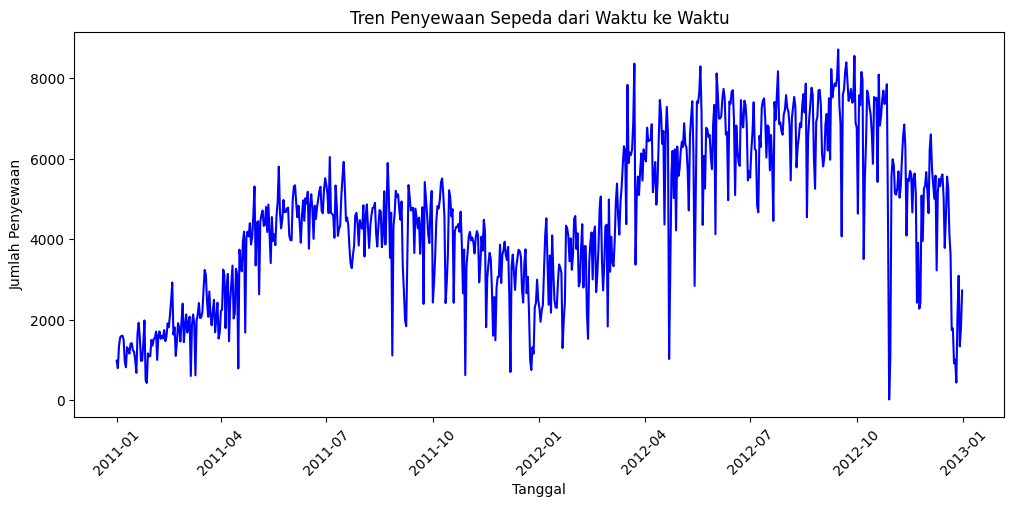

In [33]:
# Bagaimana tren penyewaan sepeda dari waktu ke waktu?
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_df['dteday'], y=day_df['cnt'], color='blue')
plt.title("Tren Penyewaan Sepeda dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.show()

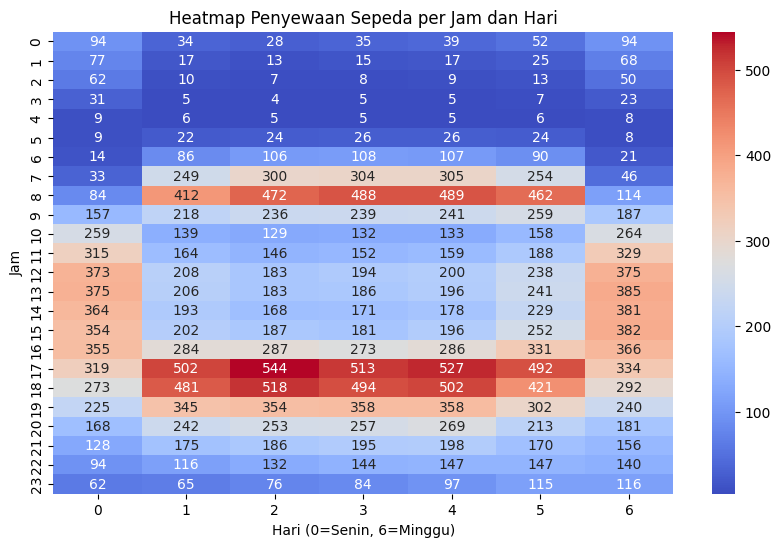

In [36]:
# Kapan waktu paling sibuk untuk penyewaan sepeda?
heatmap_data = hour_df.pivot_table(index='hr', columns='weekday', values='cnt', aggfunc='mean', observed=False)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Heatmap Penyewaan Sepeda per Jam dan Hari")
plt.xlabel("Hari (0=Senin, 6=Minggu)")
plt.ylabel("Jam")
plt.show()

In [50]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.to_csv("all_data.csv", index=False)